# Importation des librairies

In [ ]:
#importation
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf



In [ ]:
 !pip install tensorflow

# Load data

In [ ]:
# Imporatation du jeux de données


path = r"C:\Users\Danielle\Documents\Dataset\Frauddata\Fraud.csv"
Data_large = pd.read_csv(path)
Data_large

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [ ]:
# Imporatation du jeux de données

#df = pd.read_parquet('C:\Users\Danielle\Documents\Dataset\Frauddata\Fraud.csv')

In [ ]:

Data_large.to_csv(r'C:\Users\Danielle\Documents\Dataset\Frauddata\Data.csv')

In [ ]:
Data_large.shape

(1048575, 11)

In [ ]:
# l'analyse explo sur l'echantillonnage aleatoire

Data = Data_large.sample(n=1000000)
Data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
281756,15,CASH_OUT,212674.49,C1921582009,20357.00,0.00,C1688264927,33816.49,246490.99,0,0
627900,34,TRANSFER,837702.46,C671237113,125368.00,0.00,C580675565,2526436.84,3364139.30,0,0
224129,14,PAYMENT,5010.26,C354328249,17959.00,12948.74,M1775120960,0.00,0.00,0,0
871448,42,CASH_OUT,286747.22,C1531488531,0.00,0.00,C676611824,1686625.43,1973372.64,0,0
147408,12,PAYMENT,24520.31,C547446501,455902.27,431381.96,M1786979258,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
503795,20,CASH_OUT,101212.66,C464086324,0.00,0.00,C1480326885,930025.02,1031237.68,0,0
870126,42,CASH_OUT,267781.34,C640010463,3469.29,0.00,C615661501,3607931.88,3875713.22,0,0
120779,11,CASH_OUT,70669.84,C989134532,9200.00,0.00,C28708826,2488279.70,2558949.54,0,0
434303,18,CASH_IN,5208.01,C47261599,94856.00,100064.01,C1662235713,1741976.84,1736768.83,0,0


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 281756 to 43761
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1000000 non-null  int64  
 1   type            1000000 non-null  object 
 2   amount          1000000 non-null  float64
 3   nameOrig        1000000 non-null  object 
 4   oldbalanceOrg   1000000 non-null  float64
 5   newbalanceOrig  1000000 non-null  float64
 6   nameDest        1000000 non-null  object 
 7   oldbalanceDest  1000000 non-null  float64
 8   newbalanceDest  1000000 non-null  float64
 9   isFraud         1000000 non-null  int64  
 10  isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 91.6+ MB


In [ ]:
Data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.0
mean,26.966127,1.586230e+05,8.748396e+05,8.946352e+05,9.780356e+05,1.114061e+06,0.001089,0.0
std,15.624180,2.649629e+05,2.974279e+06,3.010775e+06,2.295589e+06,2.415373e+06,0.032982,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,15.000000,1.215051e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,20.000000,7.631445e+04,1.601800e+04,0.000000e+00,1.265167e+05,2.184138e+05,0.000000,0.0
75%,39.000000,2.137277e+05,1.369874e+05,1.748070e+05,9.160590e+05,1.150344e+06,0.000000,0.0
max,95.000000,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000,0.0


**Data cleaning**

In [ ]:
#count missing values
Data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#count nber of duplicate rows

Data.duplicated().sum()

0

In [ ]:
#count fraud and no fraud values

counts = Data['isFraud'].value_counts()
print(counts)

isFraud
0    998911
1      1089
Name: count, dtype: int64


In [ ]:

Data.isFlaggedFraud.value_counts()

isFlaggedFraud
0    5000
Name: count, dtype: int64

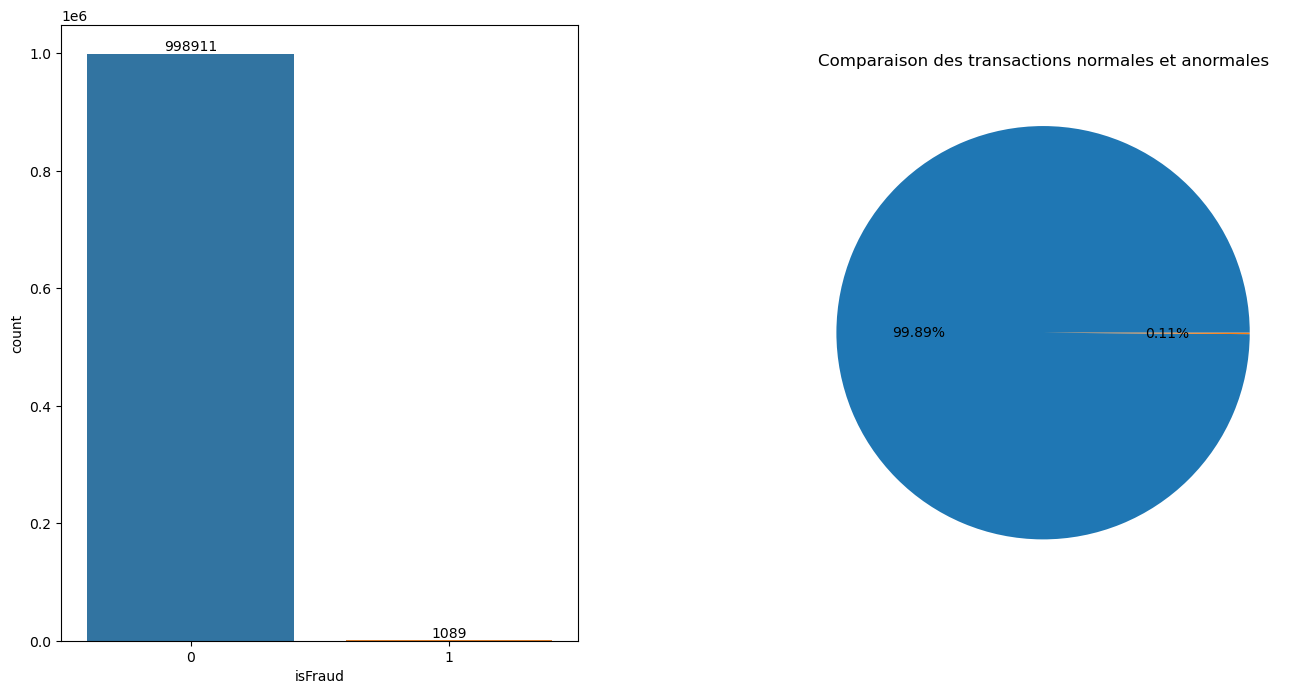

In [ ]:
# Distribution des observations frauduleuses et non frauduleuses

fig, ax = plt.subplots(ncols=2, figsize=(16, 8))

sns.countplot(x=Data['isFraud'], ax=ax[0])
ax[0].bar_label(ax[0].containers[0])

ax[1].pie(Data['isFraud'].value_counts(), autopct='%.2f%%')
ax[1].set_title("Comparaison des transactions normales et anormales", loc="center")

plt.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
#proportion de transaction frauduleuse par rapport au non frauduleuse

fraud_proportion = counts[1] / (counts[0] + counts[1])

print("Proportion de transactions frauduleuses : {:.2f}%".format(fraud_proportion * 100))


Proportion de transactions frauduleuses : 0.10%


**Distribution des Fraudes**

In [ ]:
#observations frauduleuses


fraud = Data[Data['isFraud'] == 1]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1034628,93,CASH_OUT,3723738.06,C1143980021,3723738.06,0.0,C1219235880,3216391.21,6940129.27,1,0
574991,25,TRANSFER,18126.95,C556483673,18126.95,0.0,C946378506,0.00,0.00,1,0
1030540,71,CASH_OUT,304085.48,C1476565151,304085.48,0.0,C1637975724,152325.14,456410.63,1,0
6898,6,CASH_OUT,10565.00,C1191732945,10565.00,0.0,C418964192,36275.00,24380.72,1,0
646015,35,CASH_OUT,171788.82,C432562518,171788.82,0.0,C1529736160,19962.00,0.00,1,0
1030411,63,TRANSFER,1693962.01,C279016627,1693962.01,0.0,C234112724,0.00,0.00,1,0


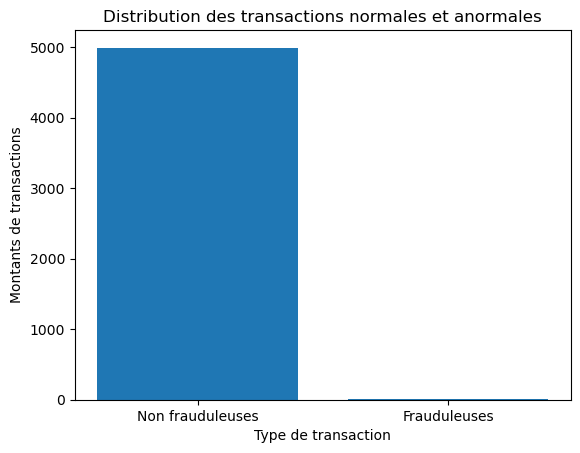

In [ ]:
counts = Data['isFraud'].value_counts()

# Créer un diagramme en barres des transactions frauduleuses et non frauduleuses
plt.bar(['Non frauduleuses', 'Frauduleuses'], counts.values)

# Ajouter des étiquettes et un titre
plt.xlabel('Type de transaction')
plt.ylabel('Montants de transactions')
plt.title('Distribution des transactions normales et anormales')

# Afficher le graphique
plt.show()


In [ ]:

type_counts = Data['type'].value_counts()
print(type_counts)

type
CASH_OUT    1749
PAYMENT     1740
CASH_IN     1086
TRANSFER     399
DEBIT         26
Name: count, dtype: int64


In [ ]:
# distribution des transactions par type

type = Data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(Data,
                values=quantity,
                names=transactions,hole=0.5,
                title="Distribution des transactions par type")
figure.show()

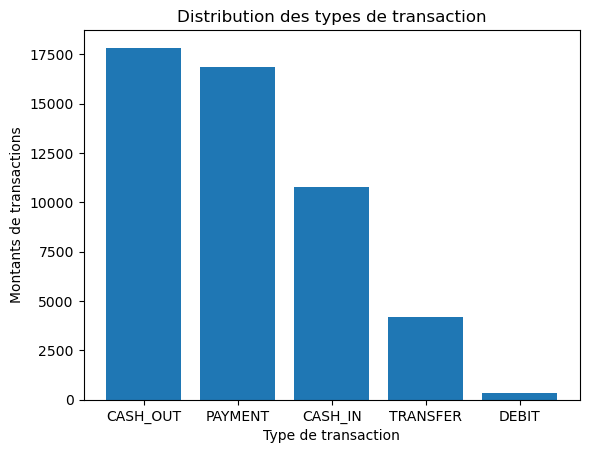

In [ ]:
#Distribution des types par 'isFraud'

# Compter le nombre de transactions pour chaque type de transaction
type_counts = Data['type'].value_counts()

# Créer un diagramme en barres des types de transaction
plt.bar(type_counts.index, type_counts.values)

# Ajouter des étiquettes et un titre
plt.xlabel('Type de transaction')
plt.ylabel('Montants de transactions')
plt.title('Distribution des types de transaction')

# Afficher le graphique
plt.show()


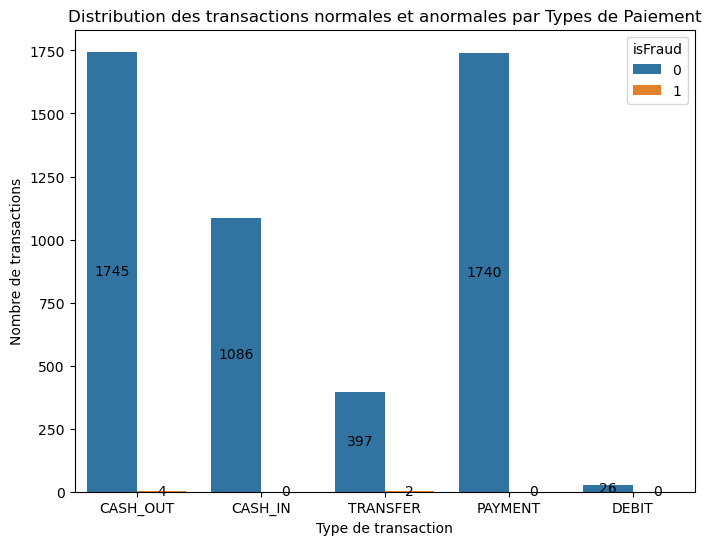

In [ ]:

# Créer le graphique de comptage
ax, figure = plt.subplots(figsize = (8, 6))

ax = sns.countplot(data=Data, x=Data['type'], hue='isFraud')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')
plt.xlabel('Type de transaction')
plt.ylabel('Nombre de transactions')
plt.title('Distribution des transactions normales et anormales par Types de Paiement')
plt.show()




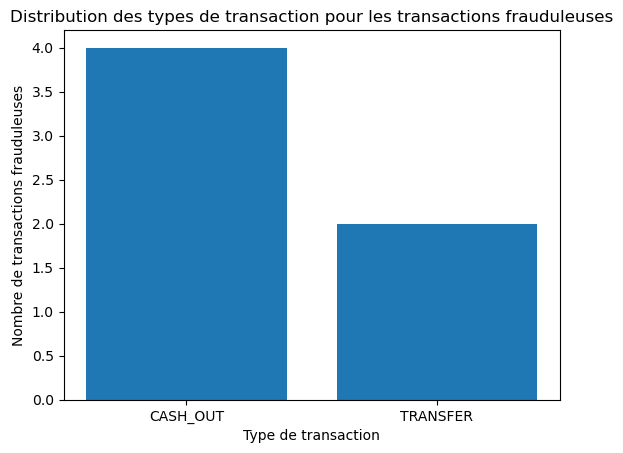

In [ ]:

# Compter le nombre de transactions pour chaque type de transaction
type_counts = fraud['type'].value_counts()

# Créer un diagramme en barres des types de transaction pour les transactions frauduleuses
plt.bar(type_counts.index, type_counts.values)

# Ajouter des étiquettes et un titre
plt.xlabel('Type de transaction')
plt.ylabel('Nombre de transactions frauduleuses')
plt.title('Distribution des types de transaction pour les transactions frauduleuses')

# Afficher le graphique
plt.show()




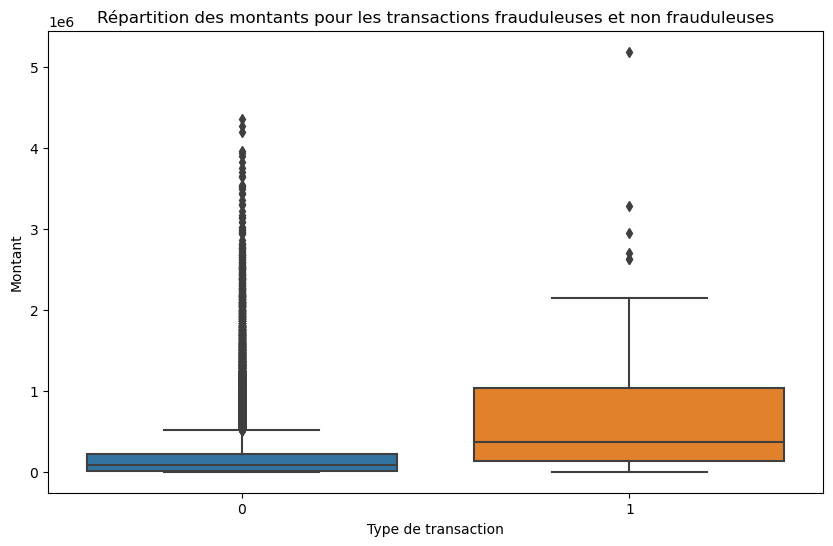

In [ ]:

#affichage en boite a moustaches
ax, figure = plt.subplots(figsize = (10, 6))

sns.boxplot(data=Data, x='isFraud', y='amount')
plt.title('Répartition des montants pour les transactions frauduleuses et non frauduleuses')
plt.xlabel('Type de transaction')
plt.ylabel('Montant')
plt.show()




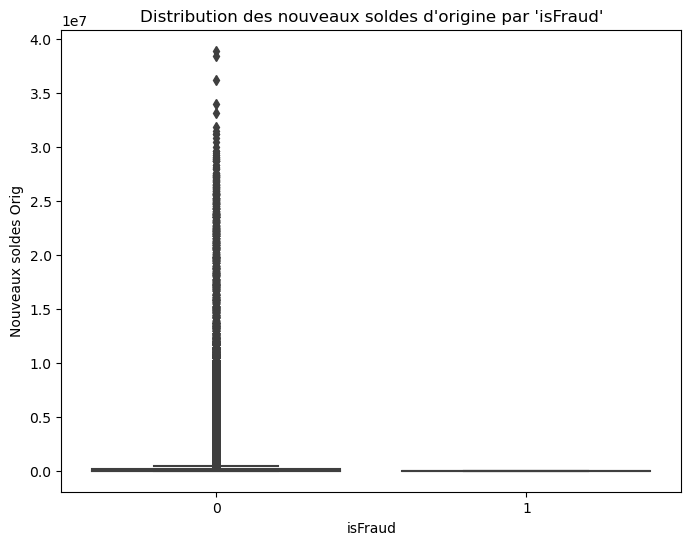

In [ ]:

#Distribution des nouveaux soldes d'origine par 'isFraud'

fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(data=Data, x='isFraud', y='newbalanceOrig', ax=ax)
ax.set_title('Distribution des nouveaux soldes d\'origine par \'isFraud\'')
ax.set_xlabel('isFraud')
ax.set_ylabel('Nouveaux soldes Orig')

plt.show()




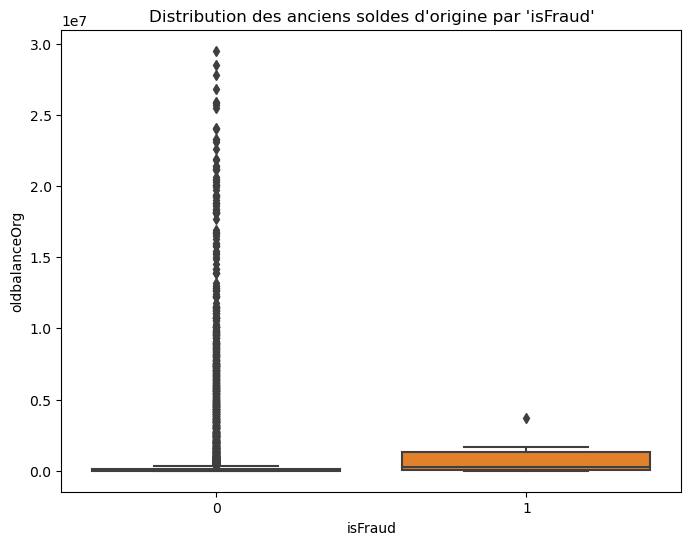

In [ ]:

#Distribution des anciens soldes d'origine par 'isFraud'

fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(data=Data, x='isFraud', y='oldbalanceOrg', ax=ax)
ax.set_title("Distribution des anciens soldes d'origine par 'isFraud'")

plt.show()




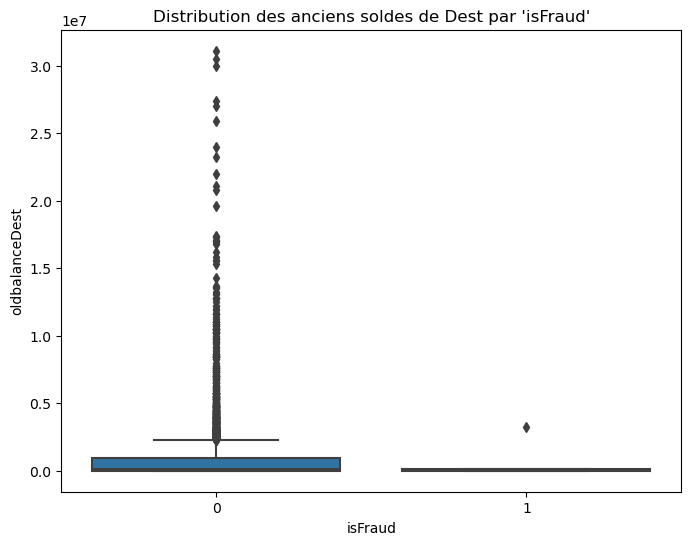

In [ ]:

#Distribution des anciens soldes de destination par 'isFraud'

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=Data, x='isFraud', y='oldbalanceDest', ax=ax)
ax.set_title("Distribution des anciens soldes de Dest par 'isFraud'")

plt.show()




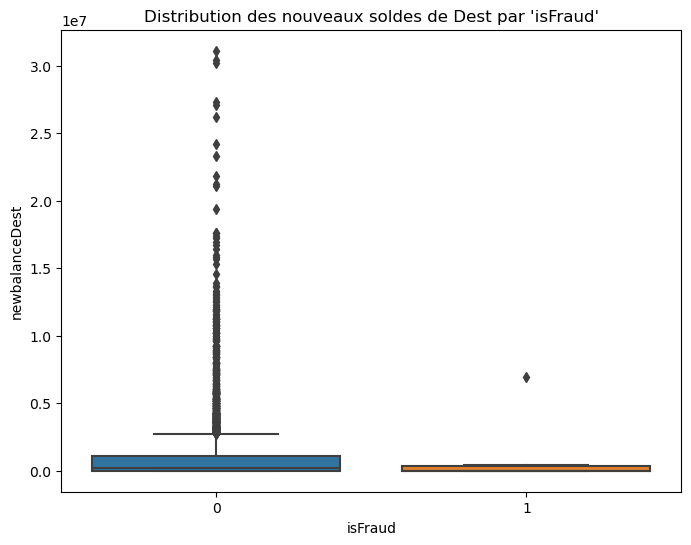

In [ ]:

#Distribution des nouveaux soldes de destination par 'isFraud'

fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(data=Data, x='isFraud', y='newbalanceDest', ax=ax)
ax.set_title("Distribution des nouveaux soldes de Dest par 'isFraud'")

plt.show()


**Croisements**

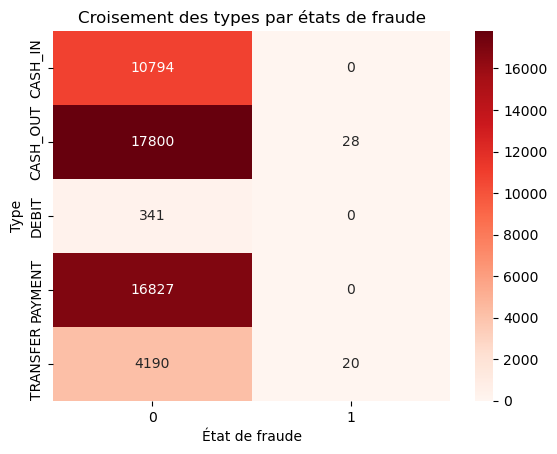

In [ ]:

# Croisement de 'type' par un meme 'isFraud'


# Créer une table de contingence des types et des états de fraude
ct = pd.crosstab(Data['type'], Data['isFraud'])

# Créer un heatmap de la table de contingence
sns.heatmap(ct, annot=True, cmap='Reds', fmt='d')

# Ajouter des étiquettes et un titre
plt.xlabel('État de fraude')
plt.ylabel('Type')
plt.title('Croisement des types par états de fraude')

# Afficher le graphique
plt.show()



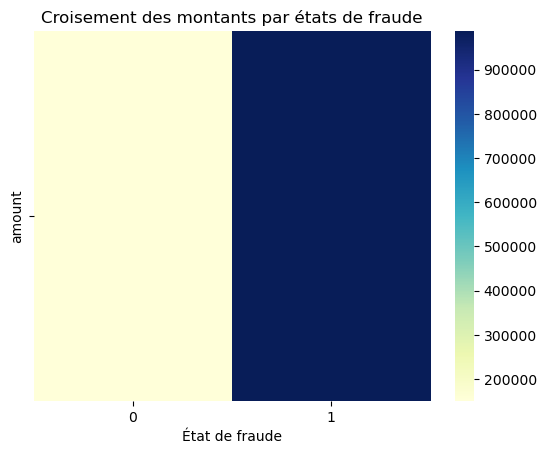

In [ ]:

# Créer une table de contingence croisant les variables 'amount' et 'isFraud'
ct = pd.crosstab(Data['amount'], Data['isFraud'])

# Créer une table pivotante à partir de la table de contingence
table = pd.pivot_table(Data, values='amount', columns='isFraud', aggfunc='mean')

# Afficher le heatmap de la table pivotante
sns.heatmap(table, cmap='YlGnBu')

# Ajouter des étiquettes et un titre
plt.xlabel('État de fraude')
#plt.ylabel('Montant')
plt.title('Croisement des montants par états de fraude')

# Afficher le graphique
plt.show()

isFraud                     0     1
newbalanceOrig                     
(-1.0, 0.0]            552071  1080
(0.0, 100000.0]        150327     0
(100000.0, 250000.0]    82789     0
(250000.0, 500000.0]    60765     2
(500000.0, 1000000.0]   30545     1
(1000000.0, inf]       122414     6


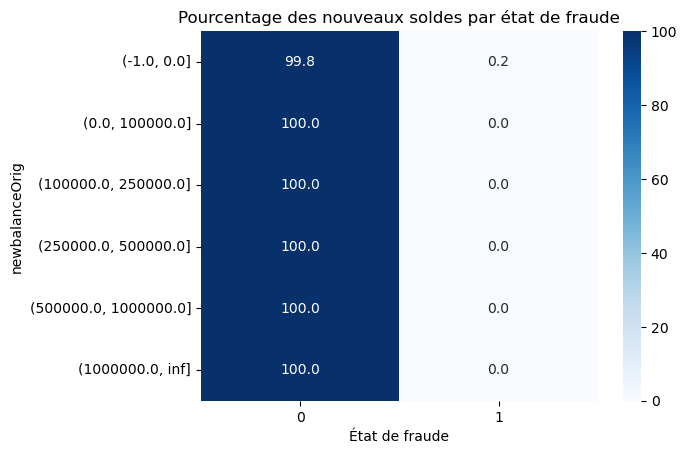

In [ ]:

# Créer une table de contingence croisant les variables 'newbalanceOrig' et 'isFraud'
ct = pd.crosstab(pd.cut(Data['newbalanceOrig'], bins=[-1, 0, 100000, 250000, 500000, 1000000, float('inf')]), Data['isFraud'])

# Afficher la table de contingence
print(ct)


# Créer une table de contingence croisant les variables 'newbalanceOrig' et 'isFraud'
ct = pd.crosstab(pd.cut(Data['newbalanceOrig'], bins=[-1, 0, 100000, 250000, 500000, 1000000, float('inf')]), Data['isFraud'])

# Normaliser les valeurs de la table de contingence en pourcentages
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Afficher le heatmap de la table de contingence normalisée
sns.heatmap(ct_pct, annot=True, fmt='.1f', cmap='Blues')

# Ajouter des étiquettes et un titre
plt.xlabel('État de fraude')
plt.ylabel('newbalanceOrig')
plt.title('Pourcentage des nouveaux soldes par état de fraude')

# Afficher le graphique
plt.show()

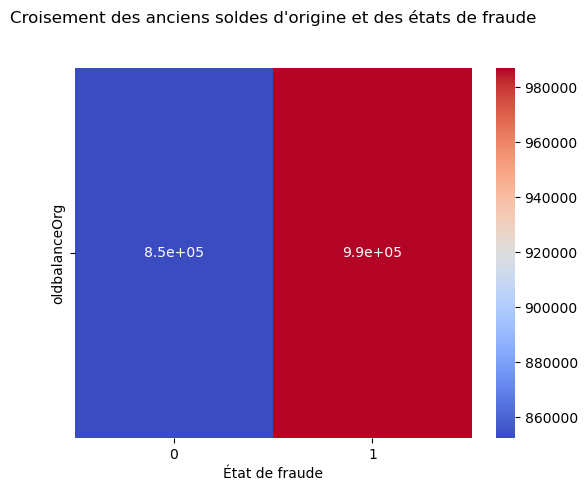

In [ ]:

#Croisement de 'oldbalanceOrg' par un meme 'isFraud'

# Créer une table pivot des anciens soldes d'origine et de l'état de fraude
pt = pd.pivot_table(Data, values='oldbalanceOrg', columns='isFraud', aggfunc='mean')

# Changer la couleur du heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Créer un heatmap de la table pivot
sns.heatmap(pt, annot=True, cmap=cmap)

# Ajouter des étiquettes et un titre
plt.xlabel('État de fraude')
#plt.ylabel('oldbalanceOrg')
plt.title('Croisement des anciens soldes d\'origine et des états de fraude' , y=1.1)

# Afficher le graphique
plt.show()


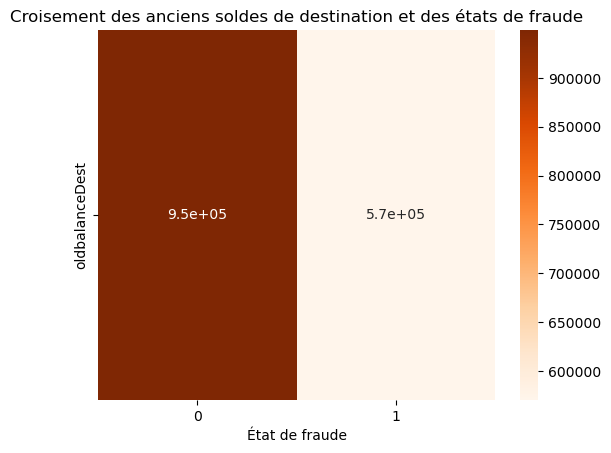

In [ ]:

#Croisement de 'oldbalanceDest' par un meme 'isFraud'

# Créer une table pivot des anciens soldes de destination et de l'état de fraude index='type'
pt = pd.pivot_table(Data, values='oldbalanceDest', columns='isFraud', aggfunc='mean')

# Créer un heatmap de la table pivot
sns.heatmap(pt, annot=True, cmap='Oranges')

# Ajouter des étiquettes et un titre
plt.xlabel('État de fraude')
#plt.ylabel('oldbalanceDest')
plt.title('Croisement des anciens soldes de destination et des états de fraude')

# Afficher le graphique
plt.show()


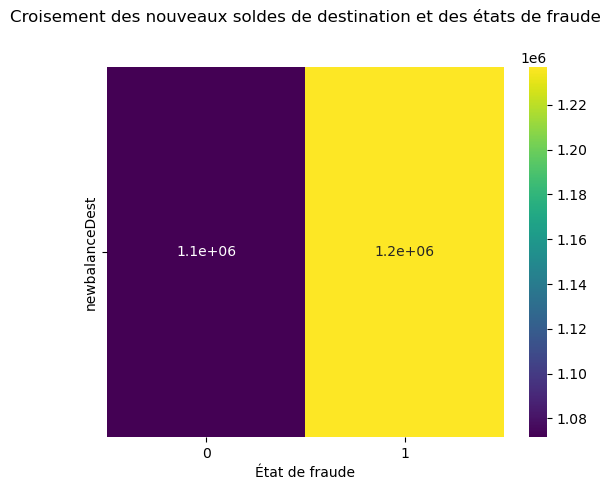

In [ ]:

#Croisement de 'newbalanceDest' par un meme 'isFraud'

# Créer une table pivot des nouveaux soldes de destination et de l'état de fraude
pt = pd.pivot_table(Data, values='newbalanceDest', columns='isFraud', aggfunc='mean')
# Changer la couleur du heatmap
cmap = sns.color_palette("viridis", as_cmap=True)

# Créer un heatmap de la table pivot
sns.heatmap(pt, annot=True, cmap=cmap)

# Ajouter des étiquettes et un titre
plt.xlabel('État de fraude')
#plt.ylabel('newbalanceDest')
plt.title('Croisement des nouveaux soldes de destination et des états de fraude', y=1.1)

# Afficher le graphique
plt.show()


# Construction du modele

**Part1: Pretraitement des donnees**

In [ ]:

# Creation of the Matrix of the independante variable

XX = Data.iloc[:, [1,9]].values
yy = Data.iloc[:, 9].values

In [ ]:

# Verifions la proportion des anomalies dans les donnees

d_proportion = Data.groupby(['isFraud']).count()
d_proportion

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,,,
0,49952,49952,49952,49952,49952,49952,49952,49952,49952,49952
1,48,48,48,48,48,48,48,48,48,48


In [ ]:
# On a moins de 3% d'anomalies dans les donnees c'est pourquoi nous alons utiliser une approche non supervisees

100*(1142/1048575)

0.10890971079798775

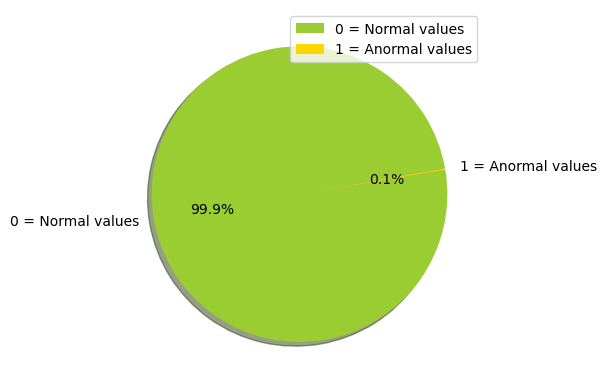

In [ ]:

 #Rapport sur la proportion des anomalies presentes dans les données

labels = d_proportion.index
labels

labels = ["0 = Normal values", "1 = Anormal values"]
sizes = [99.87225 , 0.12775]
colors = ['yellowgreen', 'gold']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=10)

# plt.axis('equal')

plt.savefig('PieChart01.png')
plt.legend()
plt.show()

count    1.000000e+06
mean     1.586230e+05
std      2.649629e+05
min      1.000000e-01
25%      1.215051e+04
50%      7.631445e+04
75%      2.137277e+05
max      1.000000e+07
Name: amount, dtype: float64


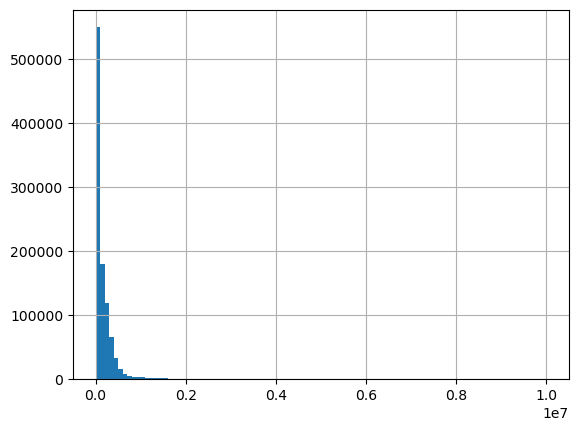

In [ ]:
# Histogramme des montants avant normalisation

d_chek = Data['amount']
print(d_chek.describe())
d_chek.hist(bins=100);

In [ ]:

print("yy = \t",yy)

yy = 	 [0 0 0 ... 0 0 0]


In [ ]:
print("XX = \n",XX, "\n\n")

XX = 
 [[1.0 0.0 1.0 ... 437487.48 1074282.17 0]
 [1.0 0.0 1.0 ... 0.0 0.0 0]
 [1.0 0.0 1.0 ... 654952.27 724081.95 0]
 ...
 [1.0 0.0 1.0 ... 0.0 128064.35 0]
 [1.0 0.0 1.0 ... 0.0 0.0 0]
 [1.0 0.0 1.0 ... 0.0 540986.97 0]] 




**Part2: Encodage des donnees**

In [ ]:
# Creation of the Matrix of the independante variable (Y = B + AX) same that the previous one

XX = Data.iloc[:, 1:-1].values
yy = Data.iloc[:, -1].values

print("XX = DATASET \n",XX, "\n\n")

XX = DATASET 
 [['CASH_OUT' 212674.49 'C1921582009' ... 33816.49 246490.99 0]
 ['TRANSFER' 837702.46 'C671237113' ... 2526436.84 3364139.3 0]
 ['PAYMENT' 5010.26 'C354328249' ... 0.0 0.0 0]
 ...
 ['CASH_OUT' 70669.84 'C989134532' ... 2488279.7 2558949.54 0]
 ['CASH_IN' 5208.01 'C47261599' ... 1741976.84 1736768.83 0]
 ['PAYMENT' 2780.16 'C1766977542' ... 0.0 0.0 0]] 




**Normalisation des donnees**

In [ ]:

from sklearn.preprocessing import LabelEncoder

label_encoder_type = LabelEncoder()
label_encoder_nameOrig = LabelEncoder()
label_encoder_nameDest = LabelEncoder()

In [ ]:
# The type
XX[:, 0] = label_encoder_type.fit_transform(XX[:, 0])

In [ ]:
#name_Orig
XX[:, 2] = label_encoder_nameOrig.fit_transform(XX[:, 2])

In [ ]:
# The nameDest
XX[:, 5] = label_encoder_nameDest.fit_transform(XX[:, 5])

In [ ]:
XX.shape

(1000000, 9)

**Encodage**

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# The type
onehotencoder_type = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

XX = np.array(onehotencoder_type.fit_transform(XX))

In [ ]:
# The nameOrig
onehotencoder_nameOrig = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')

XX = np.array(onehotencoder_nameOrig.fit_transform(XX))

In [ ]:
# The nameDest
onehotencoder_nameDest = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')

XX = np.array(onehotencoder_nameDest.fit_transform(XX))

In [ ]:
print("Pour XX = NEW DATASET, nous avons \n", XX , "\n\n")

Pour XX = NEW DATASET, nous avons 
 [[1.0 0.0 1.0 ... 33816.49 246490.99 0]
 [0.0 1.0 1.0 ... 2526436.84 3364139.3 0]
 [1.0 0.0 1.0 ... 0.0 0.0 0]
 ...
 [1.0 0.0 1.0 ... 2488279.7 2558949.54 0]
 [1.0 0.0 1.0 ... 1741976.84 1736768.83 0]
 [1.0 0.0 1.0 ... 0.0 0.0 0]] 




In [ ]:
XX.shape

(1000000, 15)

**Division du jeu de donnees en ensemble d'entrainement et test**

In [ ]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.3, random_state = 0)

**Mise a l'echelle des ktq / feature scaling**

In [ ]:

#change the scale of variables to avoid one variable dominating the other

from sklearn.preprocessing import StandardScaler
dsc = StandardScaler()
XX_train = dsc.fit_transform(XX_train)
XX_test = dsc.transform(XX_test)

In [ ]:

import numpy as np
import pandas as pd

my_array = XX
my_array.shape

df_new = pd.DataFrame(my_array, columns=['type', 'amount', 'nameOrig', 'oldbalanceOrg',
                                         'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
                                         'isFraud', 'colone_10', 'colone_11', 'colone_12', 'colone_13', 'colone_14',
                                         'colone_15'])

print(df_new)
#print(type(df_new))


       type amount nameOrig oldbalanceOrg newbalanceOrig nameDest  \
0       1.0    0.0      1.0           0.0            0.0      1.0   
1       0.0    1.0      1.0           0.0            0.0      0.0   
2       1.0    0.0      1.0           0.0            0.0      0.0   
3       1.0    0.0      1.0           0.0            0.0      1.0   
4       1.0    0.0      1.0           0.0            0.0      0.0   
...     ...    ...      ...           ...            ...      ...   
999995  1.0    0.0      1.0           0.0            0.0      1.0   
999996  1.0    0.0      1.0           0.0            0.0      1.0   
999997  1.0    0.0      1.0           0.0            0.0      1.0   
999998  1.0    0.0      1.0           0.0            1.0      0.0   
999999  1.0    0.0      1.0           0.0            0.0      0.0   

       oldbalanceDest newbalanceDest isFraud  colone_10  colone_11 colone_12  \
0                 0.0      212674.49  475775    20357.0        0.0     33481   
1          

In [ ]:
# Définition des données d'entrainements et de tests(1/5

test_data = df_new.sample(n=15000)

In [ ]:
test_data

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,colone_10,colone_11,colone_12,colone_13,colone_14,colone_15
607718,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13322.67,764897,0.0,0.0,160748,0.0,0.0,0
106581,1.0,0.0,1.0,0.0,1.0,0.0,0.0,469549.97,650082,1111471.18,1581021.14,80829,4576018.68,4106468.71,0
418469,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9071.41,443502,0.0,0.0,416768,0.0,0.0,0
921878,1.0,0.0,1.0,0.0,0.0,0.0,1.0,22542.2,94444,0.0,0.0,288348,0.0,0.0,0
801540,1.0,0.0,1.0,0.0,0.0,1.0,0.0,154239.72,26789,21571.0,0.0,52246,607179.71,761419.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353407,1.0,0.0,1.0,0.0,0.0,0.0,1.0,691.14,156118,176073.97,175382.83,420933,0.0,0.0,0
935639,0.0,1.0,1.0,0.0,0.0,0.0,0.0,29749.07,686202,1281.0,0.0,14377,130646.55,160395.62,0
517048,1.0,0.0,1.0,0.0,0.0,1.0,0.0,512400.39,721837,0.0,0.0,1754,554345.23,1066745.62,0
213440,1.0,0.0,1.0,0.0,0.0,1.0,0.0,208445.47,197524,22802.56,0.0,55274,421016.35,629461.82,0


In [ ]:
test_data.shape

(15000, 15)

In [ ]:

import tensorflow as tf

tf.__version__

'2.13.0'

In [ ]:

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense


In [ ]:
# Construction du modèle

dimension_entrees = XX_train.shape[1]
dimension_encodeur = 100

model = Sequential()
model.add(Dense(dimension_encodeur, activation="tanh", input_shape=(dimension_entrees,)))
model.add(Dense(int(dimension_encodeur /2), activation="relu"))
model.add(Dense(int(dimension_encodeur /2), activation='tanh'))
model.add(Dense(dimension_entrees, activation='relu'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 100)               1600      
                                                                 
 dense_77 (Dense)            (None, 50)                5050      
                                                                 
 dense_78 (Dense)            (None, 50)                2550      
                                                                 
 dense_79 (Dense)            (None, 15)                765       
                                                                 
Total params: 9965 (38.93 KB)
Trainable params: 9965 (38.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#  Entrainement du modèle

nb_iterations = 100
batch_size = 30

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

history = model.fit(XX_train, XX_train,
                    epochs=nb_iterations,
                    batch_size=batch_size,
                    validation_data=(XX_test, XX_test),
                    verbose=1)

autoencoder = model

Epoch 1/100
23334/23334 [==============================] - 24s 1ms/step - loss: 0.2813 - acc: 0.9869 - val_loss: 0.2821 - val_acc: 0.9895
Epoch 2/100
23334/23334 [==============================] - 24s 1ms/step - loss: 0.2812 - acc: 0.9879 - val_loss: 0.2825 - val_acc: 0.9865
Epoch 3/100
23334/23334 [==============================] - 23s 1ms/step - loss: 0.2812 - acc: 0.9883 - val_loss: 0.2822 - val_acc: 0.9900
Epoch 4/100
23334/23334 [==============================] - 24s 1ms/step - loss: 0.2812 - acc: 0.9885 - val_loss: 0.2821 - val_acc: 0.9877
Epoch 5/100
23334/23334 [==============================] - 24s 1ms/step - loss: 0.2812 - acc: 0.9885 - val_loss: 0.2820 - val_acc: 0.9936
Epoch 6/100
23334/23334 [==============================] - 24s 1ms/step - loss: 0.2812 - acc: 0.9888 - val_loss: 0.2826 - val_acc: 0.9835
Epoch 7/100
23334/23334 [==============================] - 23s 1ms/step - loss: 0.2811 - acc: 0.9889 - val_loss: 0.2823 - val_acc: 0.9863
Epoch 8/100
23334/23334 [=========

23334/23334 [==============================] - 28s 1ms/step - loss: 0.2808 - acc: 0.9896 - val_loss: 0.2817 - val_acc: 0.9909
Epoch 60/100
23334/23334 [==============================] - 26s 1ms/step - loss: 0.2808 - acc: 0.9890 - val_loss: 0.2818 - val_acc: 0.9938
Epoch 61/100
23334/23334 [==============================] - 27s 1ms/step - loss: 0.2808 - acc: 0.9896 - val_loss: 0.2823 - val_acc: 0.9897
Epoch 62/100
23334/23334 [==============================] - 24s 1ms/step - loss: 0.2808 - acc: 0.9897 - val_loss: 0.2825 - val_acc: 0.9922
Epoch 63/100
23334/23334 [==============================] - 23s 997us/step - loss: 0.2809 - acc: 0.9896 - val_loss: 0.2818 - val_acc: 0.9924
Epoch 64/100
23334/23334 [==============================] - 24s 1ms/step - loss: 0.2809 - acc: 0.9894 - val_loss: 0.2822 - val_acc: 0.9895
Epoch 65/100
23334/23334 [==============================] - 23s 1ms/step - loss: 0.2809 - acc: 0.9899 - val_loss: 0.2821 - val_acc: 0.9890
Epoch 66/100
23334/23334 [============

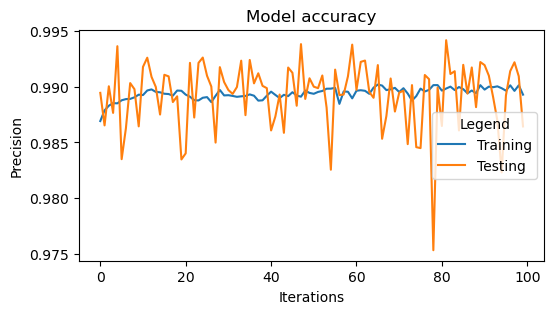

In [ ]:

#performance du modele

plt.figure(figsize=(6,3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Precision')
plt.xlabel('Iterations')
plt.legend(['Training', 'Testing'], loc=7, title="Legend")
plt.show()

In [ ]:
final_train_accuracy = history.history['acc'][-1]
final_validation_accuracy = history.history['val_acc'][-1]

print("Précision finale sur l'ensemble d'entraînement:", final_train_accuracy)
print("Précision finale sur l'ensemble de validation:", final_validation_accuracy)
/

Précision finale sur l'ensemble d'entraînement: 0.9892928600311279
Précision finale sur l'ensemble de validation: 0.986436665058136


()

In [ ]:
from sklearn.model_selection import KFold
from keras.models import clone_model
from keras.callbacks import EarlyStopping

# Définition du modèle
dimension_entrees = XX_train.shape[1]
dimension_encodeur = 20

def build_model():
    model = Sequential()
    model.add(Dense(dimension_encodeur, activation="tanh", input_shape=(dimension_entrees,)))
    model.add(Dense(int(dimension_encodeur / 2), activation="relu"))
    model.add(Dense(int(dimension_encodeur / 2), activation='tanh'))
    model.add(Dense(dimension_entrees, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Paramètres de la validation croisée
n_splits = 5  # Nombre de plis
epochs = 100    # Nombre d'époques
batch_size = 32

# Initialisation de KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Liste pour stocker les résultats de chaque pli
scores = []


In [ ]:

# Boucle sur les plis
for train_index, test_index in kf.split(XX_train):
    X_train_fold, X_test_fold = XX_train[train_index], XX_train[test_index]

    # Construction du modèle
    model = build_model()

    # Entraînement du modèle
    history = model.fit(X_train_fold, X_train_fold,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_test_fold, X_test_fold),
                        verbose=0,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

    # Évaluation du modèle sur le pli de test
    mse = model.evaluate(X_test_fold, X_test_fold, verbose=0)
    scores.append(mse)

# Affichage des résultats
print("Scores MSE pour chaque pli :", scores)
print("Moyenne des scores MSE :", np.mean(scores))


Scores MSE pour chaque pli : [0.27968308329582214, 0.40501344203948975, 0.35296744108200073, 0.2800808548927307, 0.34079375863075256]
Moyenne des scores MSE : 0.3317077159881592


In [ ]:
# score = model.evaluate(XX_test, yy_test, verbose=0)
# test_accuracy = score[1]
# print("Test accuracy:", test_accuracy)


In [ ]:
# Calcul de l'erreur de prédiction

predictions = autoencoder.predict(XX_test)
mse = np.mean(np.power(XX_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'erreur_reconstruction': mse, 'class': yy_test})

9375/9375 [==============================] - 5s 544us/step


In [ ]:

# Affichage de la prédiction et du mse(mean score error)

predictions
mse

array([0.20671954, 0.25209515, 0.12257991, ..., 0.11087414, 0.12498461,
       0.2042693 ])

In [ ]:

# Affichage erreurs de reconstructions

error_df

,erreur_reconstruction,class
0,0.206720,0
1,0.252095,0
2,0.122580,0
3,0.123241,0
4,0.217728,0
...,...,...
299995,0.149246,0
299996,0.123275,0
299997,0.110874,0
299998,0.124985,0


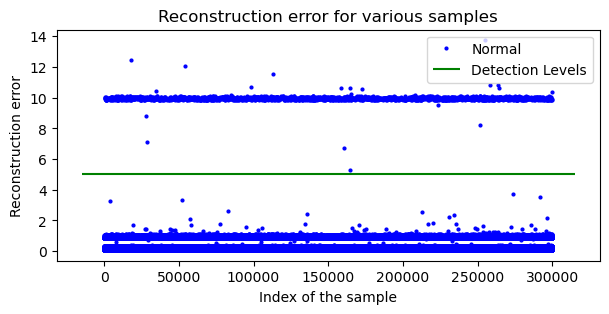

In [ ]:

# Affichage de l'erreur de reconstruction

niveau_detection = 5

groups = error_df.groupby('class')
fig, ax = plt.subplots(figsize=(7, 3))

for name, group in groups:
    ax.plot(group.index, group.erreur_reconstruction, marker='o', ms=2.0, linestyle='',
            label = "Anomalies" if name == 1 else "Normal",
            color = "red" if name == 1 else "blue")
ax.hlines(niveau_detection, ax.get_xlim()[0], ax.get_xlim()[1], colors="green",
          zorder=100, label='Detection Levels')
ax.legend()
plt.title("Reconstruction error for various samples")
plt.ylabel("Reconstruction error")
plt.xlabel("Index of the sample")
plt.show();


In [ ]:

valeurs_normales = error_df[error_df['class'] == 0]
valeurs_anormales = error_df[error_df['class'] == 1]

print('Valeurs normales: %d, Valeurs anormales: %d' % (len(valeurs_normales), len(valeurs_anormales)))

Valeurs normales: 300000, Valeurs anormales: 0


In [ ]:
# Erreurs de reconstructions

# Sauvegarde en fichier csv
valeurs_anormales.to_csv("valeurs_anormales.csv")

# Visualisation
valeurs_normales.head(3)


,erreur_reconstruction,class
0,0.206720,0
1,0.252095,0
2,0.122580,0


In [ ]:
# Calcul des faux positifs

vraies_valeurs_anormales = len(valeurs_anormales[valeurs_anormales['erreur_reconstruction'] >= niveau_detection])
vraies_valeurs_normales = len(valeurs_normales[valeurs_normales['erreur_reconstruction'] < niveau_detection])

faux_positifs = len(valeurs_normales[valeurs_normales['erreur_reconstruction'] >= niveau_detection])
faux_negatifs = len(valeurs_anormales[valeurs_anormales['erreur_reconstruction'] < niveau_detection])

print('Faux positifs: %d, Vraies valeurs anormales: %d' % (faux_positifs, vraies_valeurs_anormales))
print('Faux negatifs: %d, Vraies valeurs normales: %d' % (faux_negatifs, vraies_valeurs_normales))

Faux positifs: 2090, Vraies valeurs anormales: 0
Faux negatifs: 0, Vraies valeurs normales: 297910


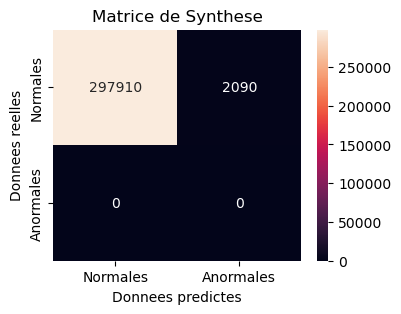

In [ ]:

# La matrice de synthese

from sklearn.metrics import confusion_matrix

labels = ["Normales", "Anormales"]

y_pred = [1 if e > niveau_detection else 0 for e in error_df.erreur_reconstruction.values]
conf_matrix = confusion_matrix(error_df['class'], y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Matrice de Synthese")
plt.ylabel('Donnees reelles')
plt.xlabel('Donnees predictes')
plt.show()


Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    300000
           1       0.00      0.00      0.00         0

    accuracy                           0.99    300000
   macro avg       0.50      0.50      0.50    300000
weighted avg       1.00      0.99      1.00    300000



Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


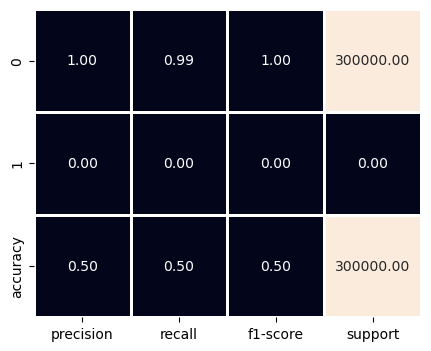

In [ ]:

import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt

def plot_classification_report(y_tru, y_prd, classes=[0, 1], figsize=(5, 4), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = classes + ['accuracy']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd, labels=classes)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True,
                cbar=False,
                xticklabels=xticks,
                yticklabels=yticks,
                linewidth=1,
                fmt=".2f",
                ax=ax)

    # Print classification report
    print("\nRapport de classification :\n", classification_report(y_tru, y_prd, labels=classes))

# Assuming you have error_df and y_pred defined
plot_classification_report(error_df['class'], y_pred)
plt.show()


In [ ]:
# Sauvegarde du modèle

from json import encoder
autoencoder.save("model.h5")

In [ ]:
#recharger le modele et l'utiliser sans le reentrainer
from keras.models import load_model

loaded_model = load_model("model.h5")


In [ ]:
# Chargement du modèle sauvegadé

# from keras.models import load_model

# # load model
# model = load_model('/home/ther/Documents/icube/model.h5')

In [ ]:
#Chargement du modèle sauvegadé

from keras.models import load_model

# load model
model = load_model('C:/Users/Danielle/Documents/M1IFI/TPE/model.h5')



# Explicabilite avec les valeurs de Shapley

In [ ]:
!pip install --user shap


In [ ]:

!pip show shap


Name: shap
Version: 0.43.0
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: c:\users\danielle\appdata\roaming\python\python310\site-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm
Required-by: 


In [ ]:
!pip install cloudpickle numba numpy packaging pandas scikit-learn scipy slicer tqdm


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
import warnings

In [ ]:

# calculer les valeurs SHAP

explainer = shap.DeepExplainer(model, XX_train)
shap_values = explainer.shap_values(XX_test)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


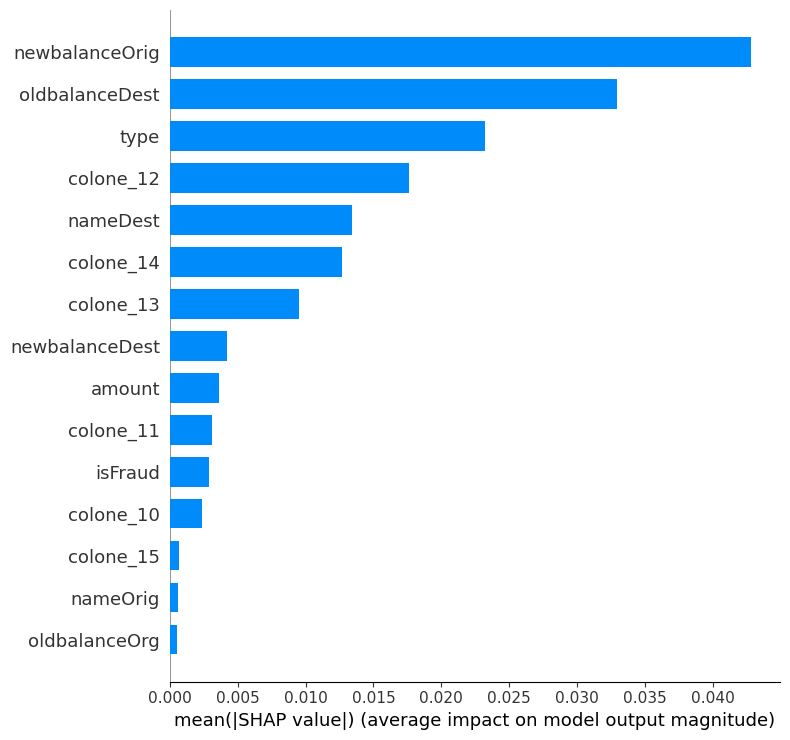

In [ ]:

#SHAP Interprétation globale

# The summary plot

shap.summary_plot(shap_values[0],
                  plot_type = 'bar',
                  feature_names = test_data.columns)

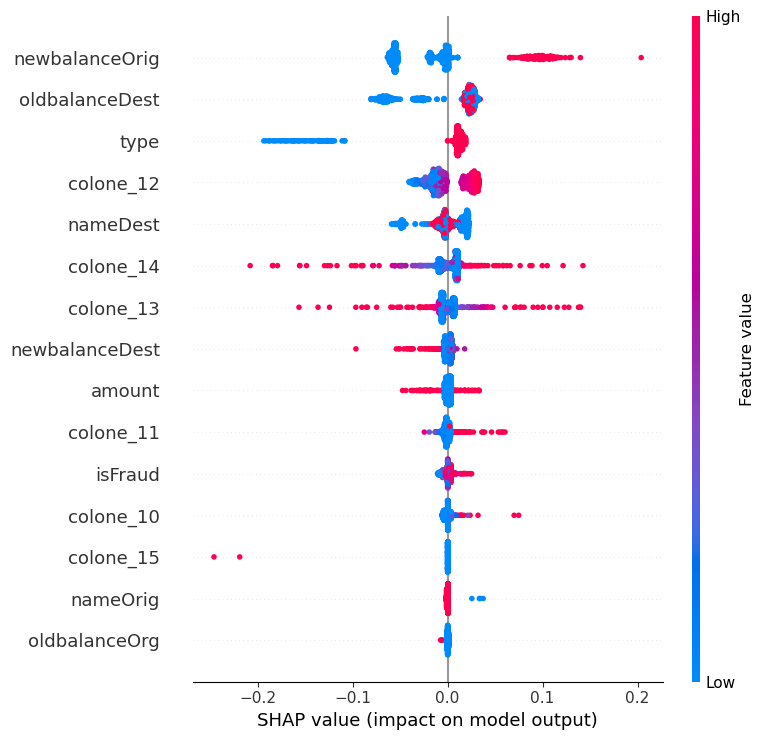

In [ ]:

shap.summary_plot(shap_values[0],
                  XX_test,
                 feature_names = test_data.columns)

In [ ]:


# force plot

shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(),
                shap_values[0][0],
                features = test_data.columns)

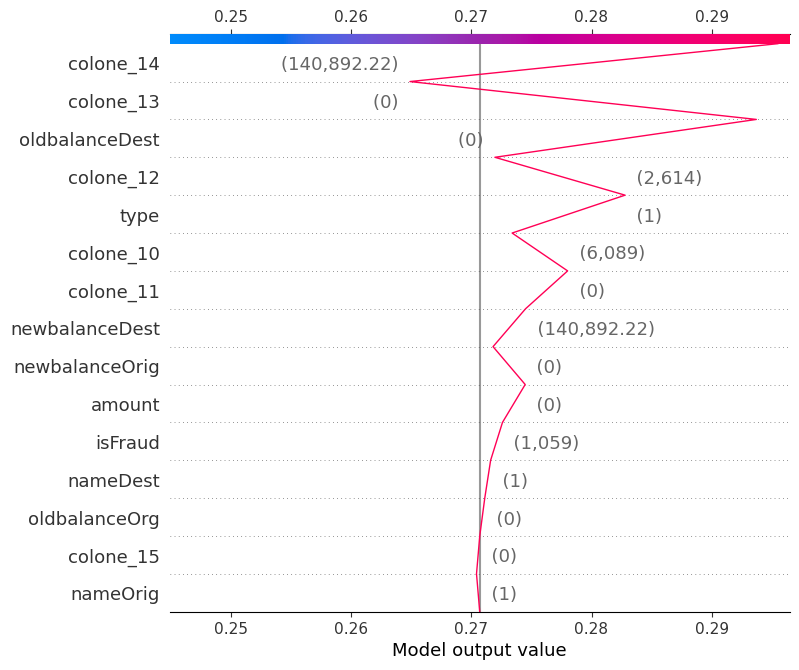

In [ ]:

# decision plot

shap.decision_plot(explainer.expected_value[0].numpy(),
                   shap_values[0][0],
                   features = test_data.iloc[0,:],
                   feature_names = test_data.columns.tolist())


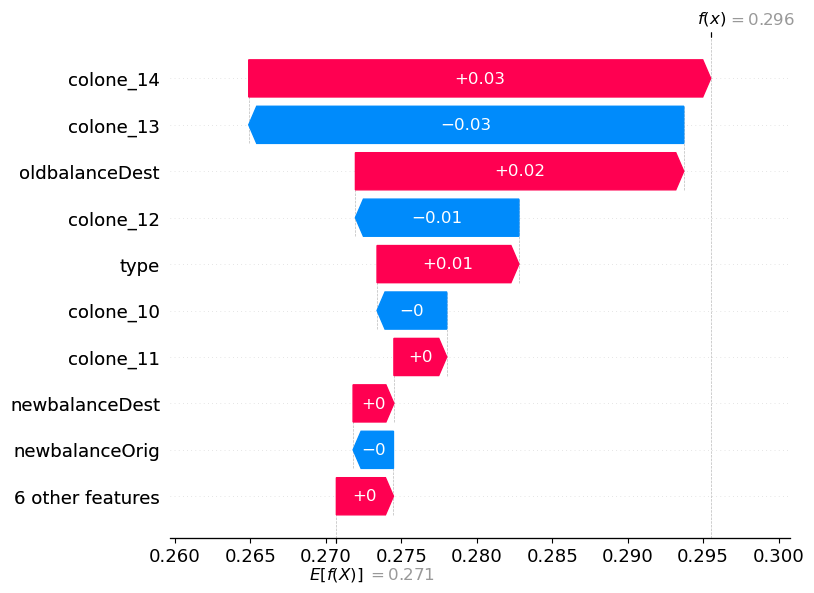

In [ ]:
# waterfall plot

shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(),
                                       shap_values[0][0],
                                       feature_names = test_data.columns)